<a href="https://colab.research.google.com/github/jparkgit/ESAA-23-2/blob/main/Week5_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[과제함](https://cafe.naver.com/esaa2019?iframe_url_utf8=%2FArticleRead.nhn%253Fclubid%3D29858915%2526page%3D1%2526menuid%3D80%2526boardtype%3DL%2526articleid%3D2389%2526referrerAllArticles%3Dfalse)

기한: 10월 6일 (금) 18시 30분

과제: 파이썬 머신러닝 완벽가이드 ch3\~6  pg.147~175 필사하여 깃허브에 업로드하고, 깃허브 링크를 댓글로 달아주세요.

# CH 3 평가

분류의 성능 평가 지표 겸 목차
1. Accuracy
2. Confusion Matrix (오차 행렬)
3. 정밀도(precision) & 재현율(recall)\
    a. 정밀도/재현율 trade-off\
    b. 정밀도와 재현율의 blind spot
4. F1 score
5. ROC curve, AUC



### (import data)

In [1]:
competition_name = "titanic"

# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")
kaggle_creds_path = "/content/drive/My Drive/kaggle.json"

Mounted at /content/drive


In [2]:
! pip install kaggle --quiet

! mkdir ~/.kaggle
! cp "/content/drive/My Drive/kaggle.json" ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c {competition_name}

! mkdir kaggle_data
! unzip {competition_name + ".zip"} -d kaggle_data

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 46.0MB/s]
Archive:  titanic.zip
  inflating: kaggle_data/gender_submission.csv  
  inflating: kaggle_data/test.csv    
  inflating: kaggle_data/train.csv   


In [3]:
# Unmount your Google Drive
drive.flush_and_unmount()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
titanic_df = pd.read_csv('kaggle_data/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### transform datasets

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
## 생성된 MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [ ]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,
                                                    y_titanic_df,
                                                    test_size = 0.2,
                                                    random_state = 0)

## 1. Accuracy

$= \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수}$
* 직관적으로 모델 예측 성능을 나타내는 평가 지표
* binary classification의 경우 데이터 구성에 따라 모델의 성능을 왜곡할 수 있음
  * (예시: 타이타닉 예제의 sex feature)

In [ ]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  # fit 는 아무것도 학습하지 않도록
  def fit(self, X, y=None):
    pass
  # predict 는 sex 가 1이면 0, 아니면 1로 예측함
  def predict(self, X):
    pred = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1
    return pred

생성한 MyDummyClassifier 로 앞 장의 타이타닉 생존자 예측 수행

In [ ]:
# 객체 생성
myclf = MyDummyClassifier()
# 학습
myclf.fit(X_train, y_train)
# 예측
mypredictions = myclf.predict(X_test)
print(accuracy_score(y_test, mypredictions))

0.7877094972067039


In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [7]:
class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass

  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

digits = load_digits()

y = (digits.target ==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

# 불균형한 레이블 데이터 분포도 확인
print(y_test.shape)
print(pd.Series(y_test).value_counts())

(450,)
0    405
1     45
dtype: int64


In [8]:
# Dummy Classifier 로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print(accuracy_score(y_test, fakepred))

0.9


## 2. Confusion Matrix 오차행렬

Predicted Class:
* Negative
  * actually negative: TN
  * actually positive: FN
* Positive
  * actually positive: TP
  * actually negative: FP


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

## 3. 정밀도 & 재현율

정밀도 = TP / (FP + TP)

재현율 = TP / (FN + TP)

In [10]:
# confusion matrix, accuracy, precision, recall 등의 평가를 한꺼번에 호출하는 get_clf_eval() 함수 만들기

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print(confusion)
  print(accuracy, precision, recall)

In [12]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

[[401   4]
 [  2  43]]
0.9866666666666667 0.9148936170212766 0.9555555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.1 정밀도/재현율 trade-off

In [13]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(pred_proba.shape)
print(pred_proba[:3])

(450, 2)
[[9.99999978e-01 2.21947441e-08]
 [9.78600878e-01 2.13991217e-02]
 [9.99999790e-01 2.10079091e-07]]


In [14]:
#예측 확률 array와 예측 결과값 array를 병합concatenate해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print(pred_proba_result[:3])

[[9.99999978e-01 2.21947441e-08 0.00000000e+00]
 [9.78600878e-01 2.13991217e-02 0.00000000e+00]
 [9.99999790e-01 2.10079091e-07 0.00000000e+00]]


In [15]:
from sklearn.preprocessing import Binarizer

X = [
    [1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]
]

# X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [16]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

#predict_proba() 반환값의 두번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

[[401   4]
 [  2  43]]
0.9866666666666667 0.9148936170212766 0.9555555555555556


In [17]:
## 임곗값을 0.4에서 0.6까지 0.05씩 증가시키며 평가 지표 조사.

# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  #threshold list 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict)

  get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


In [18]:
from sklearn.metrics import precision_recall_curve

#레이블값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape: ', thresholds.shape)

#반환된 임곗값 배열 로우가 147건이므로 샘플 10건만 추출하되, 임곗값을 15 step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

#15 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임곗값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임곗값 별 재현율:', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape:  (450,)
샘플 추출을 위한 임곗값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150 165 180 195 210 225 240 255
 270 285 300 315 330 345 360 375 390 405 420 435]
샘플용 10개의 임곗값: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.93
 1.   1.  ]
샘플 임곗값별 정밀도: [0.1   0.103 0.107 0.111 0.115 0.12  0.125 0.13  0.136 0.143 0.15  0.158
 0.167 0.176 0.188 0.2   0.214 0.231 0.25  0.273 0.3   0.333 0.375 0.429
 0.5   0.587 0.733 0.956 1.    1.   ]
샘플 임곗값 별 재현율: [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    0.978 0.978 0.956 0.667 0.333]


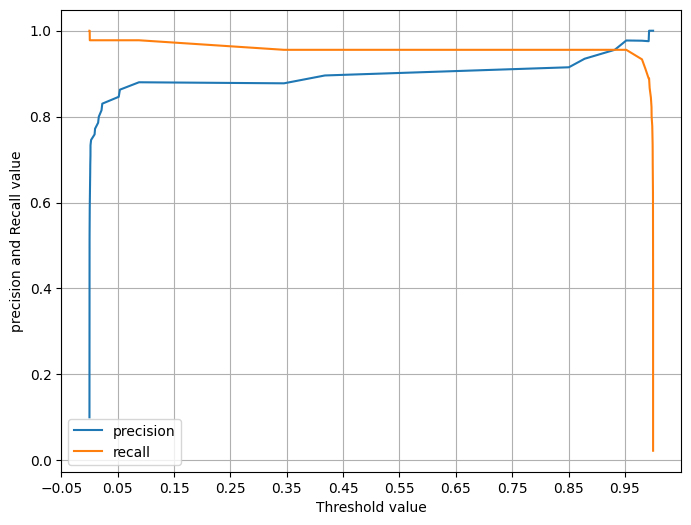

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
  #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  #X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
  plt.figure(figsize=(8, 6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label = 'precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  #threshold값 X축의 scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

### 3.2 정밀도 & 재현율의 맹점

## 4. F1 score

In [21]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f1)

0.9347826086956522


In [22]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    #F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    #f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))


thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

Streaming output truncated to the last 5000 lines.
오차 행렬
[[400   5]
 [  2  43]]
정확도: 0.9844, 정밀도: 0.8958, 재현율: 0.9556, F1:0.9247
임곗값: 0.45
오차 행렬
[[401   4]
 [  2  43]]
정확도: 0.9867, 정밀도: 0.9149, 재현율: 0.9556, F1:0.9348
임곗값: 0.5
오차 행렬
[[401   4]
 [  2  43]]
정확도: 0.9867, 정밀도: 0.9149, 재현율: 0.9556, F1:0.9348
임곗값: 0.55
오차 행렬
[[401   4]
 [  2  43]]
정확도: 0.9867, 정밀도: 0.9149, 재현율: 0.9556, F1:0.9348
임곗값: 0.6
오차 행렬
[[401   4]
 [  2  43]]
정확도: 0.9867, 정밀도: 0.9149, 재현율: 0.9556, F1:0.9348
임곗값: 0.4
오차 행렬
[[400   5]
 [  2  43]]
정확도: 0.9844, 정밀도: 0.8958, 재현율: 0.9556, F1:0.9247
임곗값: 0.45
오차 행렬
[[401   4]
 [  2  43]]
정확도: 0.9867, 정밀도: 0.9149, 재현율: 0.9556, F1:0.9348
임곗값: 0.5
오차 행렬
[[401   4]
 [  2  43]]
정확도: 0.9867, 정밀도: 0.9149, 재현율: 0.9556, F1:0.9348
임곗값: 0.55
오차 행렬
[[401   4]
 [  2  43]]
정확도: 0.9867, 정밀도: 0.9149, 재현율: 0.9556, F1:0.9348
임곗값: 0.6
오차 행렬
[[401   4]
 [  2  43]]
정확도: 0.9867, 정밀도: 0.9149, 재현율: 0.9556, F1:0.9348
임곗값: 0.4
오차 행렬
[[400   5]
 [  2  43]]
정확도: 0.9844, 정밀도: 0.8958, 재현율: 0.9556, F1:0.92

RecursionError: ignored

## 5. ROC curve, AUC

ROC: Receiver Operation Characteristic Curve

TPR (True Positive Rate) = FP / (FP+TN) = 1 - TNR = 1 - 특이성

In [23]:
from sklearn.metrics import roc_curve
#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)

#반환된 임계값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5step으로 추출
#threshold[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

#5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))


샘플 추출을 위한 임곗값 배열의 index: [1 6]
샘플 index로 추출한 임곗값:  [1.   0.09]
샘플 임곗값별 FPR:  [0.    0.015]
샘플 임곗값별 TPR:  [0.022 0.978]


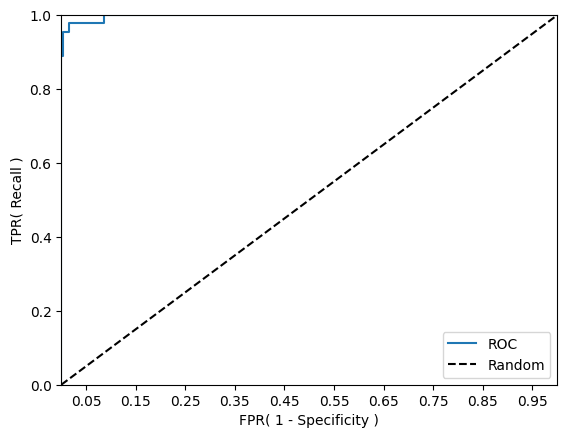

In [24]:
def roc_curve_plot(y_test , pred_proba_c1):

    #임곗값에 따른 FPR, TPR 값을 반환받음
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs , tprs, label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    #FPR X 축의 scale을 0.1 단위로 변경, x, y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [25]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9976


In [26]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    #ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))